In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camacha
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | matay
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | morehead
Processing Record 10 of Set 1 | ust-kuyga
Processing Record 11 of Set 1 | baykit
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | fare
Processing Record 20 of Set 1 | asau
Processing Record 21 of Set 1 | villaviciosa
Processin

Processing Record 35 of Set 4 | gat
Processing Record 36 of Set 4 | manicore
Processing Record 37 of Set 4 | kirakira
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | puerto maldonado
Processing Record 41 of Set 4 | concordia
Processing Record 42 of Set 4 | tanete
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | sambava
Processing Record 45 of Set 4 | port augusta
Processing Record 46 of Set 4 | atar
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | jalu
Processing Record 49 of Set 4 | kamenka
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | karaul
City not found. Skipping...
Processing Record 2 of Set 5 | safaga
Processing Record 3 of Set 5 | turiacu
Processing Record 4 of Set 5 | linjiang
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | yellowknife
Processing Record 8 of Set 5 | pa

Processing Record 25 of Set 8 | fortuna
Processing Record 26 of Set 8 | compiegne
Processing Record 27 of Set 8 | avera
Processing Record 28 of Set 8 | cabra
Processing Record 29 of Set 8 | ballina
Processing Record 30 of Set 8 | kamaishi
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | karachi
Processing Record 33 of Set 8 | guymon
Processing Record 34 of Set 8 | miedzyrzec podlaski
Processing Record 35 of Set 8 | wilmington
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | oron
Processing Record 40 of Set 8 | qui nhon
Processing Record 41 of Set 8 | vila velha
Processing Record 42 of Set 8 | henties bay
Processing Record 43 of Set 8 | bergen
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | murgab
Processing Record 46 of Set 8 | lengshuitan
Processing Record 47 of Set 8 | keflavik
Processing Record 48 of Set 8 | aflu
City not found

Processing Record 17 of Set 12 | paytug
City not found. Skipping...
Processing Record 18 of Set 12 | muroran
Processing Record 19 of Set 12 | mitsamiouli
Processing Record 20 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 21 of Set 12 | pascagoula
Processing Record 22 of Set 12 | poum
Processing Record 23 of Set 12 | sisimiut
Processing Record 24 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 25 of Set 12 | mezen
Processing Record 26 of Set 12 | santa fe
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | alotau
City not found. Skipping...
Processing Record 29 of Set 12 | koutiala
Processing Record 30 of Set 12 | plaster rock
Processing Record 31 of Set 12 | san carlos de bariloche
Processing Record 32 of Set 12 | hamilton
Processing Record 33 of Set 12 | omsukchan
Processing Record 34 of Set 12 | ballarat
Processing Record 35 of Set 12 | ouesso
Processing Record 36 of Set 12 | pelym
Processing Record 37 of Set 12 | te

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camacha,33.0833,-16.3333,67.42,73,40,12.66,PT,2022-09-29 23:46:32
1,Ushuaia,-54.8000,-68.3000,44.26,70,40,26.46,AR,2022-09-29 23:43:40
2,Cherskiy,68.7500,161.3000,31.93,45,50,6.15,RU,2022-09-29 23:46:33
3,Mahebourg,-20.4081,57.7000,68.29,88,75,13.80,MU,2022-09-29 23:46:34
4,Jamestown,42.0970,-79.2353,53.19,79,0,5.75,US,2022-09-29 23:46:01
5,Matay,28.4190,30.7792,85.05,30,0,14.61,EG,2022-09-29 23:46:35
6,Carnarvon,-24.8667,113.6333,69.87,65,0,21.72,AU,2022-09-29 23:46:36
7,Morehead,37.2711,-87.1764,63.79,61,0,5.75,US,2022-09-29 23:46:37
8,Ust-Kuyga,70.0167,135.6000,22.32,90,94,2.86,RU,2022-09-29 23:46:37
9,Baykit,61.6700,96.3700,26.51,77,95,2.64,RU,2022-09-29 23:46:38


In [11]:
#Reorder the columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camacha,PT,2022-09-29 23:46:32,33.0833,-16.3333,67.42,73,40,12.66
1,Ushuaia,AR,2022-09-29 23:43:40,-54.8000,-68.3000,44.26,70,40,26.46
2,Cherskiy,RU,2022-09-29 23:46:33,68.7500,161.3000,31.93,45,50,6.15
3,Mahebourg,MU,2022-09-29 23:46:34,-20.4081,57.7000,68.29,88,75,13.80
4,Jamestown,US,2022-09-29 23:46:01,42.0970,-79.2353,53.19,79,0,5.75
5,Matay,EG,2022-09-29 23:46:35,28.4190,30.7792,85.05,30,0,14.61
6,Carnarvon,AU,2022-09-29 23:46:36,-24.8667,113.6333,69.87,65,0,21.72
7,Morehead,US,2022-09-29 23:46:37,37.2711,-87.1764,63.79,61,0,5.75
8,Ust-Kuyga,RU,2022-09-29 23:46:37,70.0167,135.6000,22.32,90,94,2.86
9,Baykit,RU,2022-09-29 23:46:38,61.6700,96.3700,26.51,77,95,2.64


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

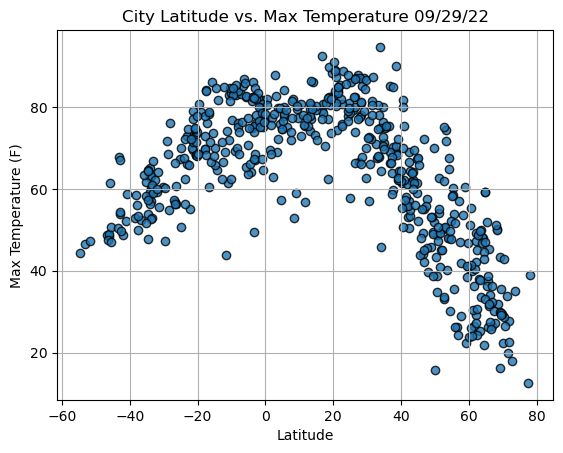

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

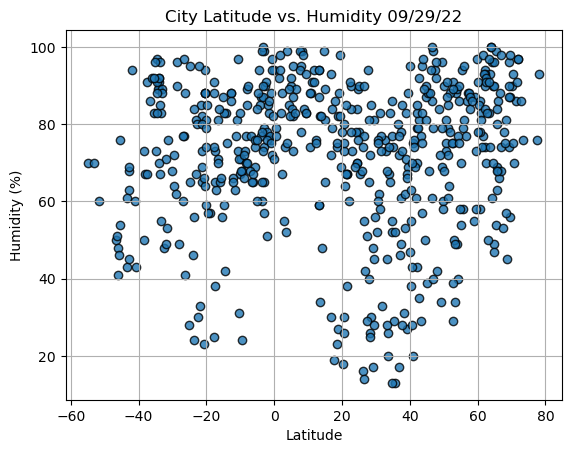

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

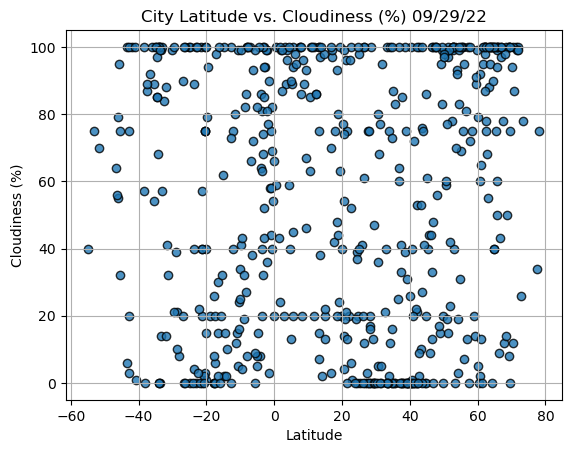

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

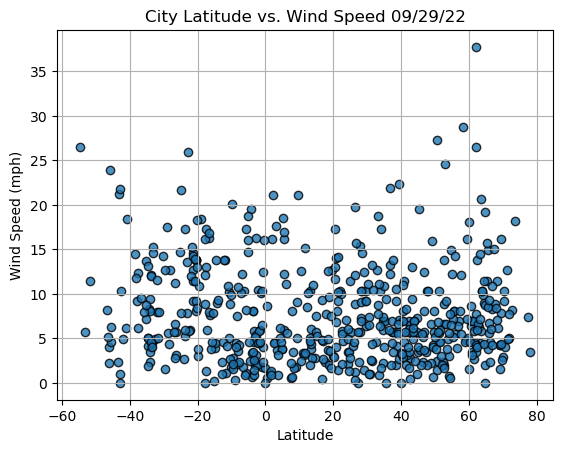

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-09-29 23:46:41
Lat                        -33.65
Lng                      115.3333
Max Temp                    60.31
Humidity                       67
Cloudiness                      0
Wind Speed                  12.15
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camacha,PT,2022-09-29 23:46:32,33.0833,-16.3333,67.42,73,40,12.66
2,Cherskiy,RU,2022-09-29 23:46:33,68.7500,161.3000,31.93,45,50,6.15
4,Jamestown,US,2022-09-29 23:46:01,42.0970,-79.2353,53.19,79,0,5.75
5,Matay,EG,2022-09-29 23:46:35,28.4190,30.7792,85.05,30,0,14.61
7,Morehead,US,2022-09-29 23:46:37,37.2711,-87.1764,63.79,61,0,5.75


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

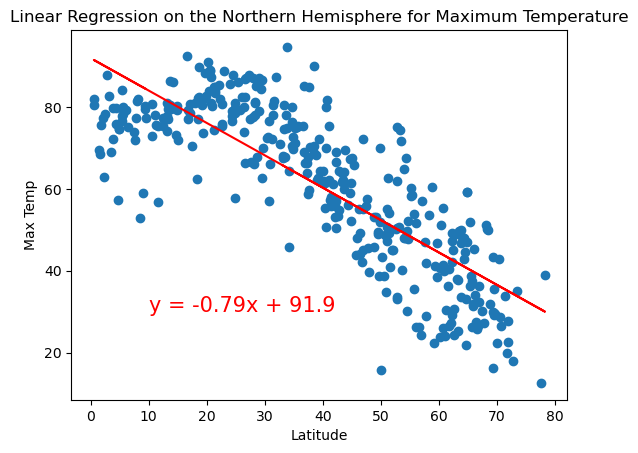

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp',(10,30))

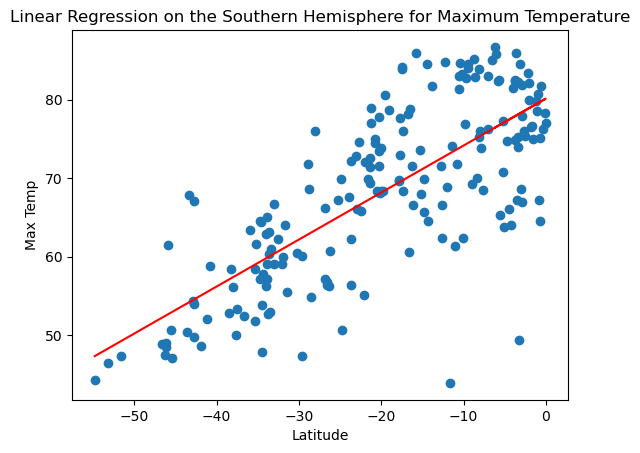

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp',(-50,90))

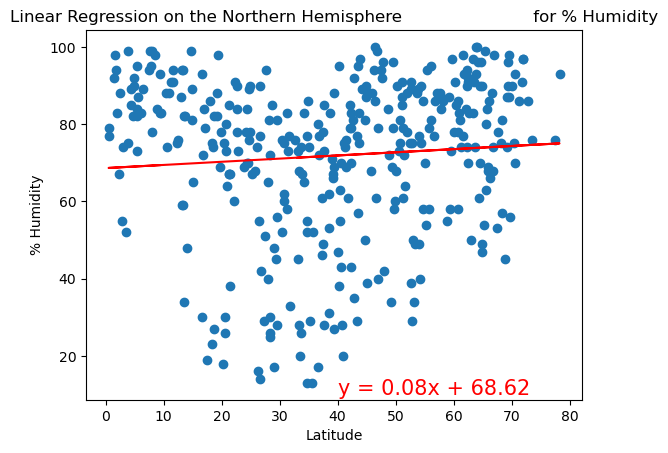

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

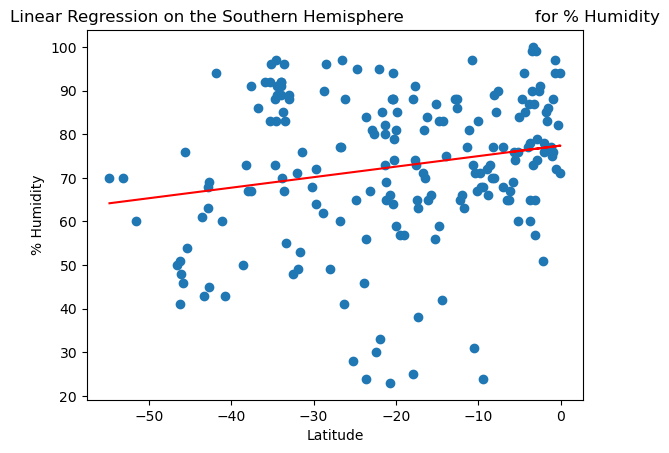

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

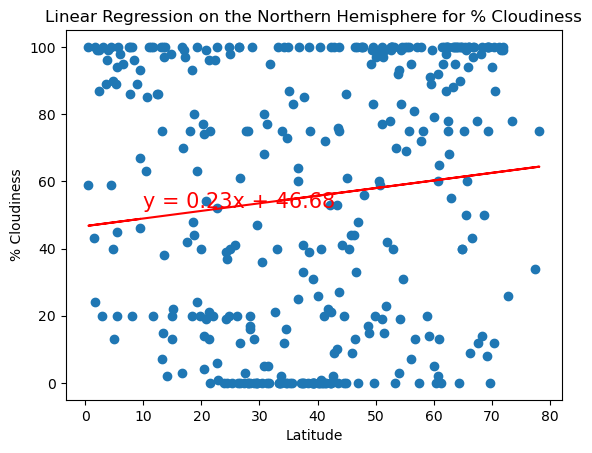

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(10,52))

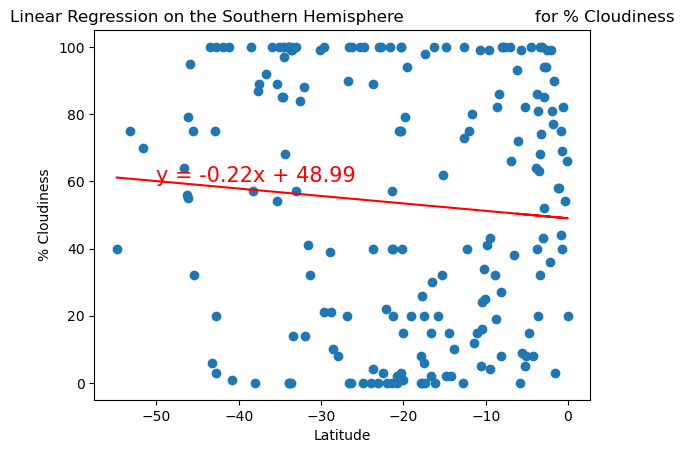

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

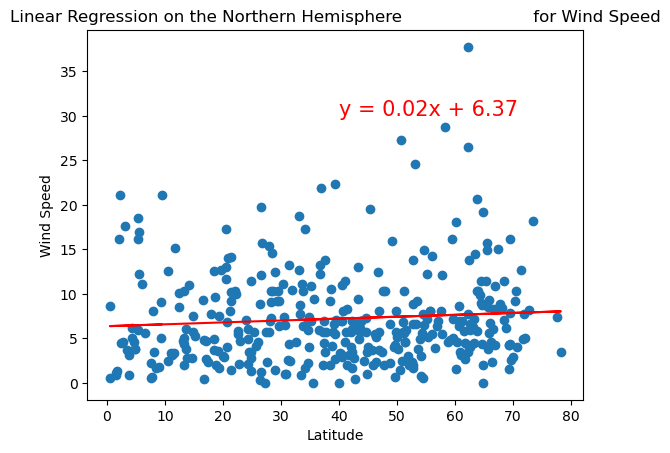

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

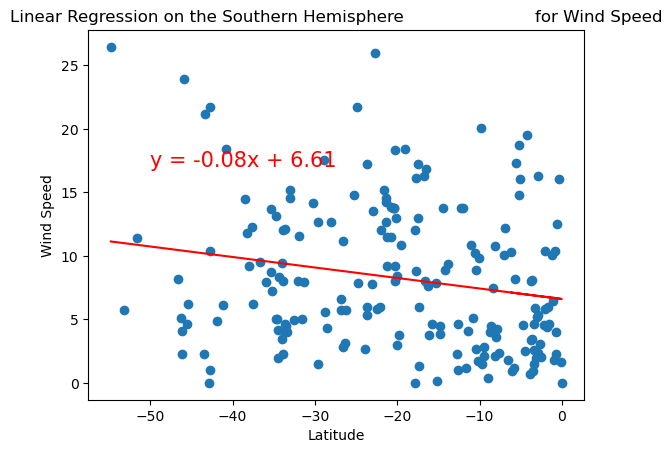

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17))